In [4]:
%matplotlib inline
import sklearn.linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
trains = pd.read_csv('../data/sydtrains.csv', thousands=',', index_col='STATION' )
trains2014 = trains[trains.YEAR == 2014]

In [6]:
scatter_data_in  = trains2014.loc[:, ["IN_1500_1830", "IN_1830_0200", "OUT_0600_0930"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77acf90250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f77aa8a0f10>]], dtype=object)

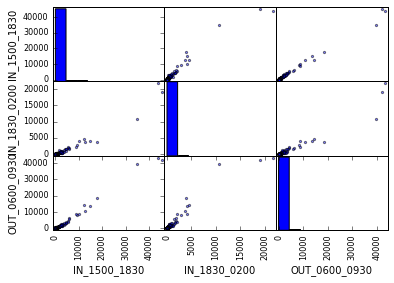

In [7]:
pd.scatter_matrix(scatter_data_in)

In [8]:
people_in_the_am  = trains2014.loc[:, ["OUT_0600_0930"]]

In [9]:
people_in_the_pm = trains2014.IN_1500_1830

In [10]:
regressor = sklearn.linear_model.RANSACRegressor()

In [15]:
regressor.fit(people_in_the_am, people_in_the_pm)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [16]:
predictions_for_pm = regressor.predict(people_in_the_am)
predictions_for_pm

array([  4.81836945e+04,   4.94889698e+04,   4.53784975e+04,
         1.57006586e+04,   2.10133582e+04,   1.22542738e+04,
         9.40327769e+03,   4.99511104e+03,   4.65161753e+03,
         1.00330158e+04,   1.63303967e+04,   2.53340758e+03,
         1.02047625e+04,   3.87303225e+03,   3.36924178e+03,
         4.38827251e+03,   2.60210628e+03,   2.31586169e+03,
         3.41504091e+03,   1.86932013e+03,   2.06396645e+03,
         7.21636904e+03,   1.82352100e+03,   3.70128550e+03,
         6.74692791e+03,   9.07538319e+02,   1.23958204e+03,
         2.08686602e+03,   2.61355606e+03,   1.68612360e+03,
         1.52582663e+03,   2.84255173e+03,   1.90366949e+03,
         8.38839618e+02,   2.12121537e+03,   4.10202792e+03,
         1.02203615e+03,   2.43035953e+03,   1.51437685e+03,
         7.93040484e+02,   1.20523269e+03,   2.67080498e+03,
         1.75482230e+03,   1.28538117e+03,   1.22813226e+03,
         1.06783529e+03,   3.33489243e+03,   1.15943356e+03,
         1.98381797e+03,

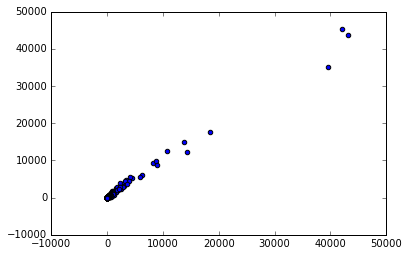

In [17]:
plt.scatter(trains2014.OUT_0600_0930, trains2014.IN_1500_1830)

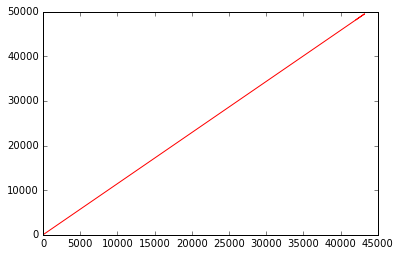

In [18]:
plt.plot(trains2014.OUT_0600_0930, predictions_for_pm, color='red')

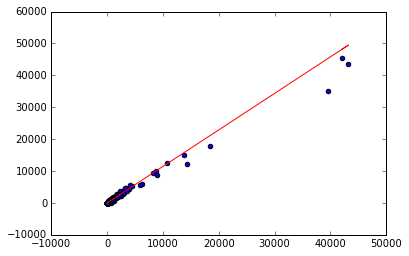

In [19]:
plt.scatter(trains2014.OUT_0600_0930, trains2014.IN_1500_1830)
plt.plot(trains2014.OUT_0600_0930, predictions_for_pm, color='red')

In [20]:
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regressor.estimator_.coef_ # for every person getting on the station 1.144 people get out

array([ 1.14497835])

In [23]:
regressor.estimator_.intercept_

14.455204168541854